<a href="https://colab.research.google.com/github/hijunshi/deep-learning-engineer/blob/homeworks_submission/%EC%9D%B4%EC%A4%80%EC%84%B1_KNN_implemented_by_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ╔══<i><b>&nbsp;Alai-DeepLearning&nbsp;</b></i>══════════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 4. Tensorflow basis**
# Homework 1. Tensorflow로 K-NN 구현하기

### _Objective_
1. Tensorflow 을 이용해서 K-NN 알고리즘을 구현합니다.


╚═══════════════════════════════════════════════╝

In [0]:
%matplotlib inline
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

## 예제 데이터 )  영화 분석 결과



#### 데이터 ) 각 영화 별 싸움 횟수와 키스 횟수

| 영화 제목 | the number of Kick | The number os Kiss | Type |
| ------  | ----| ----| --- |
| 냉정과열정사이 | 3 | 104 | Romance|
| 바람과함께사라지다 | 2 | 100 | Romance |
| 아름다운 여인 | 1 | 81 | Romance |
| 인정사정볼것없다 | 101 | 10 | Action |
| 놈놈놈 | 99 | 5 | Action |
| 화랑 | 98 | 2 | Action |
| 뜨거운 가슴으로 | 25 | 87 | ? |

In [0]:
# 0번째 열 : 킥 횟수, 1번째 열 : 키스 횟수
dataset = np.array([
    [3, 104],
    [2, 100],
    [1, 81],
    [101, 10],
    [99, 5],
    [98, 2],
])

labels = np.array(['Romance','Romance','Romance',
          'Action','Action','Action'])

inX = np.array([25, 87])

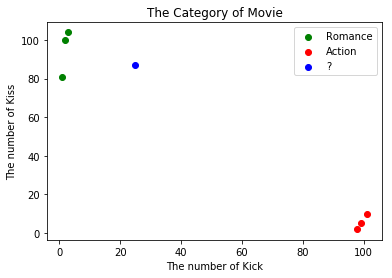

In [0]:
plt.title("The Category of Movie")
plt.scatter(dataset[:3,0],dataset[:3,1],label='Romance',
            c='g')
plt.scatter(dataset[3:,0],dataset[3:,1],label='Action',
            c='r')
plt.scatter(25,87,label="?",
            c='b')


plt.xlabel('The number of Kick')
plt.ylabel('The number of Kiss')
plt.legend()
plt.show()

<br>
<br>
## 알고리즘 탐색하기
---
KNN의 알고리즘 순서

1. 우리가 분류항목을 알고자 하는 점(inX)와 알고 있는 점들(dataset)과의 모든 점 거리를 계산
2. 오름 차순으로 거리의 길이를 정렬
3. inX와의 거리가 가장 짧은 K개의 아이템 추출
4. K개의 아이템에서 가장 많은 분류 항목 찾기
5. 해당 항목 반환


아래 코드는 Numpy 로 KNN을 구현한 코드 입니다.

---

In [0]:
def classify_knn(inX, dataset, labels, K):
    # (1) 우리가 분류항목을 알고자 하는 점 (inX)와 
    # 알고 있는 점들(dataset)과의 모든 점 거리를 계산
    dists = np.sqrt(np.sum((inX-dataset)**2, axis=1))
    
    # (2) 오름 차순으로 거리의 길이를 정렬
    sorted_index = dists.argsort()
    
    # (3) inX와의 거리가 가장짧은 K개의 아이템 추출
    sorted_labels = labels[sorted_index]
    K_nearest_labels = sorted_labels[:K]
    
    # (4) K개의 아이템에서 가장 많은 분류 항목 찾기
    _labels, count_labels = np.unique(K_nearest_labels,
          return_counts=True)
    
    # (5) 해당 항목 반환
    return _labels[count_labels.argmax()]

In [0]:
# 킥 횟수가 52번, 키스 횟수가 10번인 작품
classify_knn([52, 10], dataset, labels, 4)

'Action'

In [0]:
# 킥 횟수가 19번, 키스 횟수가 72번인 작품
classify_knn([19, 72], dataset, labels, 4)

'Romance'

## \[ 문제 : 텐서플로우를 이용해 K-NN 구현하기 \]

텐서플로우는 numpy와 달리, Dataflow Programming 방식으로 동작합니다. <br>
우선 연산을 결정하고, 반복적인 연산은 Session 시에 진행해야 합니다.<br>



In [0]:
graph = tf.Graph()
with graph.as_default():
    inX_tf = tf.placeholder(tf.float32, shape=(2), name='inX')
    dataset_tf = tf.placeholder(tf.float32, shape=(None,2), name='dataset')
    labels_tf = tf.placeholder(tf.string, shape=(None,), name='labels')
    K_tf = tf.placeholder_with_default(4,(),name='K')
    
    ##########
    # CODE HERE!
    # 아래의 결과가 나오도록 수정해 주세요!
    #
    #
    #
    #
    #
    ##########        
    
    # 1.거리계산
    dists_tf = tf.math.sqrt(tf.math.reduce_sum(tf.math.square(tf.subtract(inX_tf,dataset_tf)), axis=[1]))
    # 2.거리가 가장 짧은 K개의 아이템 추출
    # 음수로 만들어서 큰 값을 K개 뽑아내었다.
    _, top_k_idx = tf.math.top_k(tf.negative(dists_tf), k=K_tf)
    # 거리가 K번째까지 가까운 순위의 인덱스에 해당하는 라벨을 모았다.
    top_k_label = tf.gather(labels_tf, top_k_idx)
    # 3.추출한 라벨을 요약하여 가장 많은 건의 라벨을 정한다.
    # 거리가 K번째까지 가까운 순위의 라벨의 정보를 요약한다. 
    # 라벨, 인덱스, 카운트    
    label_, idx_, cnt_ = tf.unique_with_counts(top_k_label)
    # 가장 큰 카운트를 기록한 것의 라벨을 반환받는다.
    max_label_idx = tf.math.argmax(cnt_)
    # 최다 인덱스의 라벨을 아웃풋에 넣는다.
    output = label_[max_label_idx]
    

In [0]:
# 아래와 같은 결과가 나오면 됩니다.
sess = tf.Session(graph=graph)

In [0]:
# 킥 횟수가 52번, 키스 횟수가 10번인 작품
sess.run(output,feed_dict={
    inX_tf:[52,10],
    dataset_tf: dataset,
    labels_tf: labels,
})
# >>> b'Action' 
# 이 나와야 합니다.

b'Action'

In [0]:
# 킥 횟수가 19번, 키스 횟수가 72번인 작품
sess.run(output,feed_dict={
    inX_tf:[19,72],
    dataset_tf: dataset,
    labels_tf: labels,
})
# >>> b'Romance' 
# 이 나와야 합니다.

b'Romance'